In [114]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
from statistics import mean
from math import sqrt
import pandas as pd

In [115]:
DataSet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/letter-recognition.csv")
DataSet.shape
DataSet.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [116]:

x = DataSet.drop("letter", axis = 1)
y = DataSet['letter']
print(x)

       xbox   ybox   width   height  ...  xedge   xedgey  yedge   yedgex
0          2      8       3       5  ...       0       8       0       8
1          5     12       3       7  ...       2       8       4      10
2          4     11       6       8  ...       3       7       3       9
3          7     11       6       6  ...       6      10       2       8
4          2      1       3       1  ...       1       7       5      10
...      ...    ...     ...     ...  ...     ...     ...     ...     ...
19995      2      2       3       3  ...       2       8       3       7
19996      7     10       8       8  ...       2       9       3       7
19997      6      9       6       7  ...       2      12       2       4
19998      2      3       4       2  ...       1       9       5       8
19999      4      9       6       6  ...       2       7       2       8

[20000 rows x 16 columns]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


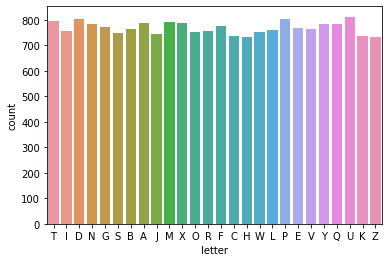

In [117]:
import seaborn as sns
sns.countplot(y)
#20000*70/100=14000
x_test=x.iloc[0:6000, :].values.astype('float32')
x_train=x.iloc[6000:, :].values.astype('float32')
y_test=y[0:6000]
y_train=y[6000:]


In [118]:
#Make the normalization
print((min(x_train[2]), max(x_train[2])))

# Normalizing the data
x_train = x_train/255.0
x_test = x_test/255.0

# Printing the shape of the Datasets
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

(1.0, 13.0)
x_train shape: (14000, 16)
14000 train samples
6000 test samples


In [113]:
from sklearn import  svm
model_rbf = svm.SVC(C=1.0, kernel='rbf')
model_linear=svm.SVC(C=200, kernel='linear')
model_poly=svm.SVC(C=100, kernel='poly')
model_sigmoid=svm.SVC(C=10, kernel='sigmoid')
# Train the svm algorithm
model_rbf.fit(x_train, y_train)
y_prediction_rbf = model_rbf.predict(x_test)


model_linear.fit(x_train, y_train)
y_prediction_linear = model_linear.predict(x_test)

model_poly.fit(x_train, y_train)
y_prediction_poly = model_poly.predict(x_test)

model_sigmoid.fit(x_train, y_train)
y_prediction_sigmoid = model_sigmoid.predict(x_test)



In [119]:
import math
from math import sqrt
from statistics import mean
from sklearn.metrics import multilabel_confusion_matrix
Actual_class = y_test
Predicted_class_sigmoid=y_prediction_sigmoid

# Class = Label A-Z
The_Classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z' ]


# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(Actual_class,Predicted_class_sigmoid, labels=The_Classes)
# Temp store results
sens = [];
spec = [];
rec=[]
acc = [];
bal_acc = [];
prec = [];


for AllClasses in range(len(The_Classes)):
    ArrayOfData = arr_out_matrix[AllClasses];
    print("Class: {}".format(The_Classes[AllClasses]));
    #True_Positive
    True_Positive = ArrayOfData[1][1]
    #False Positive
    False_Positive = ArrayOfData[0][1]
    #True_Negative
    True_Negative = ArrayOfData[0][0]
    #False_Negative
    False_Negative = ArrayOfData[1][0]
    
    
    sensitivity = round(True_Positive/(True_Positive+False_Negative), 3);
    specificity = round(True_Negative/(True_Negative+False_Positive), 3);
    recall=round(True_Positive/(True_Positive+False_Negative),3)
    accuracy = round((True_Positive+True_Negative)/(True_Positive+False_Positive+True_Negative+False_Negative), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(True_Positive/(True_Positive+False_Positive), 3);  
    sens.append(sensitivity);
    spec.append(specificity);
    acc.append(accuracy);
    bal_acc.append(balanced_accuracy);
    prec.append(precision);
    rec.append(recall);

    print("True Positive={0}, False Positive={1}, True Negative={2}, False Negative={3}".format(True_Positive, False_Positive, True_Negative, False_Negative));
    print("Sensitivity: {}".format(sensitivity));
    print("Specificity: {}".format(specificity));
    print("Accuracy: {}".format(accuracy));
    print("Balanced Accuracy: {}".format(balanced_accuracy));
    print("Recall :{}".format(recall));
    
    print("Precision: {}".format(precision));
    print(" ");
    print(" ");

print("Overall Performance Prediction for Sigmoid Kernel");
print("Sensitivity: {}".format(round(mean(sens), 4)));
print("Specificity: {}".format(round(mean(spec), 4)));
print("Accuracy: {}".format(round(mean(acc), 4)));
print("Balanced Accuracy: {}".format(round(mean(bal_acc), 4)));
print("Recall :{}".format(round(mean(rec), 4)));
print("Precision: {}".format(round(mean(prec), 4)));



Class: A
True Positive=70, False Positive=891, True Negative=4874, False Negative=165
Sensitivity: 0.298
Specificity: 0.845
Accuracy: 0.824
Balanced Accuracy: 0.572
Recall :0.298
Precision: 0.073
 
 
Class: B
True Positive=11, False Positive=12, True Negative=5754, False Negative=223
Sensitivity: 0.047
Specificity: 0.998
Accuracy: 0.961
Balanced Accuracy: 0.522
Recall :0.047
Precision: 0.478
 
 
Class: C
True Positive=6, False Positive=516, True Negative=5247, False Negative=231
Sensitivity: 0.025
Specificity: 0.91
Accuracy: 0.876
Balanced Accuracy: 0.468
Recall :0.025
Precision: 0.011
 
 
Class: D
True Positive=19, False Positive=220, True Negative=5531, False Negative=230
Sensitivity: 0.076
Specificity: 0.962
Accuracy: 0.925
Balanced Accuracy: 0.519
Recall :0.076
Precision: 0.079
 
 
Class: E
True Positive=29, False Positive=205, True Negative=5555, False Negative=211
Sensitivity: 0.121
Specificity: 0.964
Accuracy: 0.931
Balanced Accuracy: 0.542
Recall :0.121
Precision: 0.124
 
 
Cla

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in long_scalars


In [120]:
Actual_class = y_test
#Predicted_class = y_prediction_linear
Predicted_class_linear=y_prediction_linear
# Class = Label A-Z
The_Classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z' ]


# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(Actual_class,Predicted_class_linear, labels=The_Classes)
# Temp store results
sens = [];
spec = [];
rec=[]
acc = [];
bal_acc = [];
prec = [];


for AllClasses in range(len(The_Classes)):
    ArrayOfData = arr_out_matrix[AllClasses];
    print("Class: {}".format(The_Classes[AllClasses]));
    #True_Positive
    True_Positive = ArrayOfData[1][1]
    #False Positive
    False_Positive = ArrayOfData[0][1]
    #True_Negative
    True_Negative = ArrayOfData[0][0]
    #False_Negative
    False_Negative = ArrayOfData[1][0]
    
    
    sensitivity = round(True_Positive/(True_Positive+False_Negative), 3);
    specificity = round(True_Negative/(True_Negative+False_Positive), 3);
    recall=round(True_Positive/(True_Positive+False_Negative),3)
    accuracy = round((True_Positive+True_Negative)/(True_Positive+False_Positive+True_Negative+False_Negative), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(True_Positive/(True_Positive+False_Positive), 3);  
    sens.append(sensitivity);
    spec.append(specificity);
    acc.append(accuracy);
    bal_acc.append(balanced_accuracy);
    prec.append(precision);
    rec.append(recall);

    print("True Positive={0}, False Positive={1}, True Negative={2}, False Negative={3}".format(True_Positive, False_Positive, True_Negative, False_Negative));
    print("Sensitivity: {}".format(sensitivity));
    print("Specificity: {}".format(specificity));
    print("Accuracy: {}".format(accuracy));
    print("Balanced Accuracy: {}".format(balanced_accuracy));
    print("Recall :{}".format(recall));
    
    print("Precision: {}".format(precision));
    print(" ");
    print(" ");

print("Overall Performance Prediction for Linear kernel");
print("Sensitivity: {}".format(round(mean(sens), 4)));
print("Specificity: {}".format(round(mean(spec), 4)));
print("Accuracy: {}".format(round(mean(acc), 4)));
print("Balanced Accuracy: {}".format(round(mean(bal_acc), 4)));
print("Recall :{}".format(round(mean(rec), 4)));
print("Precision: {}".format(round(mean(prec), 4)));

Class: A
True Positive=216, False Positive=35, True Negative=5730, False Negative=19
Sensitivity: 0.919
Specificity: 0.994
Accuracy: 0.991
Balanced Accuracy: 0.956
Recall :0.919
Precision: 0.861
 
 
Class: B
True Positive=203, False Positive=111, True Negative=5655, False Negative=31
Sensitivity: 0.868
Specificity: 0.981
Accuracy: 0.976
Balanced Accuracy: 0.924
Recall :0.868
Precision: 0.646
 
 
Class: C
True Positive=186, False Positive=18, True Negative=5745, False Negative=51
Sensitivity: 0.785
Specificity: 0.997
Accuracy: 0.988
Balanced Accuracy: 0.891
Recall :0.785
Precision: 0.912
 
 
Class: D
True Positive=213, False Positive=62, True Negative=5689, False Negative=36
Sensitivity: 0.855
Specificity: 0.989
Accuracy: 0.984
Balanced Accuracy: 0.922
Recall :0.855
Precision: 0.775
 
 
Class: E
True Positive=197, False Positive=56, True Negative=5704, False Negative=43
Sensitivity: 0.821
Specificity: 0.99
Accuracy: 0.984
Balanced Accuracy: 0.906
Recall :0.821
Precision: 0.779
 
 
Class

In [121]:
Actual_class = y_test
Predicted_class_rbf=y_prediction_rbf
# Class = Label A-Z
The_Classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z' ]


# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(Actual_class,Predicted_class_rbf, labels=The_Classes)
# Temp store results
sens = [];
spec = [];
rec=[]
acc = [];
bal_acc = [];
prec = [];


for AllClasses in range(len(The_Classes)):
    ArrayOfData = arr_out_matrix[AllClasses];
    print("Class: {}".format(The_Classes[AllClasses]));
    #True_Positive
    True_Positive = ArrayOfData[1][1]
    #False Positive
    False_Positive = ArrayOfData[0][1]
    #True_Negative
    True_Negative = ArrayOfData[0][0]
    #False_Negative
    False_Negative = ArrayOfData[1][0]
    
    
    sensitivity = round(True_Positive/(True_Positive+False_Negative), 3);
    specificity = round(True_Negative/(True_Negative+False_Positive), 3);
    recall=round(True_Positive/(True_Positive+False_Negative),3)
    accuracy = round((True_Positive+True_Negative)/(True_Positive+False_Positive+True_Negative+False_Negative), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(True_Positive/(True_Positive+False_Positive), 3);  
    sens.append(sensitivity);
    spec.append(specificity);
    acc.append(accuracy);
    bal_acc.append(balanced_accuracy);
    prec.append(precision);
    rec.append(recall);

    print("True Positive={0}, False Positive={1}, True Negative={2}, False Negative={3}".format(True_Positive, False_Positive, True_Negative, False_Negative));
    print("Sensitivity: {}".format(sensitivity));
    print("Specificity: {}".format(specificity));
    print("Accuracy: {}".format(accuracy));
    print("Balanced Accuracy: {}".format(balanced_accuracy));
    print("Recall :{}".format(recall));
    
    print("Precision: {}".format(precision));
    print(" ");
    print(" ");

print("Overall Performance Prediction of rbf kernel");
print("Sensitivity: {}".format(round(mean(sens), 4)));
print("Specificity: {}".format(round(mean(spec), 4)));
print("Accuracy: {}".format(round(mean(acc), 4)));
print("Balanced Accuracy: {}".format(round(mean(bal_acc), 4)));
print("Recall :{}".format(round(mean(rec), 4)));
print("Precision: {}".format(round(mean(prec), 4)));

Class: A
True Positive=229, False Positive=5, True Negative=5760, False Negative=6
Sensitivity: 0.974
Specificity: 0.999
Accuracy: 0.998
Balanced Accuracy: 0.986
Recall :0.974
Precision: 0.979
 
 
Class: B
True Positive=218, False Positive=56, True Negative=5710, False Negative=16
Sensitivity: 0.932
Specificity: 0.99
Accuracy: 0.988
Balanced Accuracy: 0.961
Recall :0.932
Precision: 0.796
 
 
Class: C
True Positive=220, False Positive=3, True Negative=5760, False Negative=17
Sensitivity: 0.928
Specificity: 0.999
Accuracy: 0.997
Balanced Accuracy: 0.964
Recall :0.928
Precision: 0.987
 
 
Class: D
True Positive=232, False Positive=25, True Negative=5726, False Negative=17
Sensitivity: 0.932
Specificity: 0.996
Accuracy: 0.993
Balanced Accuracy: 0.964
Recall :0.932
Precision: 0.903
 
 
Class: E
True Positive=216, False Positive=23, True Negative=5737, False Negative=24
Sensitivity: 0.9
Specificity: 0.996
Accuracy: 0.992
Balanced Accuracy: 0.948
Recall :0.9
Precision: 0.904
 
 
Class: F
True

In [122]:
Actual_class = y_test
#Predicted_class = y_prediction_linear
Predicted_class_poly=y_prediction_poly


# Class = Label A-Z
The_Classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z' ]


# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(Actual_class,Predicted_class_poly, labels=The_Classes)
# Temp store results
sens = [];
spec = [];
rec=[]
acc = [];
bal_acc = [];
prec = [];


for AllClasses in range(len(The_Classes)):
    ArrayOfData = arr_out_matrix[AllClasses];
    print("Class: {}".format(The_Classes[AllClasses]));
    #True_Positive
    True_Positive = ArrayOfData[1][1]
    #False Positive
    False_Positive = ArrayOfData[0][1]
    #True_Negative
    True_Negative = ArrayOfData[0][0]
    #False_Negative
    False_Negative = ArrayOfData[1][0]
    
    
    sensitivity = round(True_Positive/(True_Positive+False_Negative), 3);
    specificity = round(True_Negative/(True_Negative+False_Positive), 3);
    recall=round(True_Positive/(True_Positive+False_Negative),3)
    accuracy = round((True_Positive+True_Negative)/(True_Positive+False_Positive+True_Negative+False_Negative), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision = round(True_Positive/(True_Positive+False_Positive), 3);  
    sens.append(sensitivity);
    spec.append(specificity);
    acc.append(accuracy);
    bal_acc.append(balanced_accuracy);
    prec.append(precision);
    rec.append(recall);

    print("True Positive={0}, False Positive={1}, True Negative={2}, False Negative={3}".format(True_Positive, False_Positive, True_Negative, False_Negative));
    print("Sensitivity: {}".format(sensitivity));
    print("Specificity: {}".format(specificity));
    print("Accuracy: {}".format(accuracy));
    print("Balanced Accuracy: {}".format(balanced_accuracy));
    print("Recall :{}".format(recall));
    
    print("Precision: {}".format(precision));
    print(" ");
    print(" ");

print("Overall Performance Prediction for polynomial kernal");
print("Sensitivity: {}".format(round(mean(sens), 4)));
print("Specificity: {}".format(round(mean(spec), 4)));
print("Accuracy: {}".format(round(mean(acc), 4)));
print("Balanced Accuracy: {}".format(round(mean(bal_acc), 4)));
print("Recall :{}".format(round(mean(rec), 4)));
print("Precision: {}".format(round(mean(prec), 4)));

Class: A
True Positive=234, False Positive=7, True Negative=5758, False Negative=1
Sensitivity: 0.996
Specificity: 0.999
Accuracy: 0.999
Balanced Accuracy: 0.998
Recall :0.996
Precision: 0.971
 
 
Class: B
True Positive=214, False Positive=22, True Negative=5744, False Negative=20
Sensitivity: 0.915
Specificity: 0.996
Accuracy: 0.993
Balanced Accuracy: 0.956
Recall :0.915
Precision: 0.907
 
 
Class: C
True Positive=229, False Positive=14, True Negative=5749, False Negative=8
Sensitivity: 0.966
Specificity: 0.998
Accuracy: 0.996
Balanced Accuracy: 0.982
Recall :0.966
Precision: 0.942
 
 
Class: D
True Positive=237, False Positive=16, True Negative=5735, False Negative=12
Sensitivity: 0.952
Specificity: 0.997
Accuracy: 0.995
Balanced Accuracy: 0.974
Recall :0.952
Precision: 0.937
 
 
Class: E
True Positive=227, False Positive=26, True Negative=5734, False Negative=13
Sensitivity: 0.946
Specificity: 0.995
Accuracy: 0.994
Balanced Accuracy: 0.97
Recall :0.946
Precision: 0.897
 
 
Class: F
